Step 1 - Data Preprocessing:

In [1]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


Importing libraries and reading features list from ‘kddcup.names’ file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Appending columns to the dataset and adding a new column name ‘target’ to the dataset.

In [3]:
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""

columns =[] 
for c in cols.split(', '): 
	if(c.strip()): 
		columns.append(c.strip()) 

columns.append('target') 
print(len(columns)) 


42


Reading the ‘attack_types’ file.

In [4]:
with open("/Users/user/Documents/Study/2023-1/gr2/kdd1999/dataset/training_attack_types", 'r') as f: 
	print(f.read()) 


back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




Creating a dictionary of attack_types

In [5]:
attacks_types = { 
	'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 


Reading the dataset(‘kddcup.data_10_percent’) and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.

In [6]:
path = "/Users/user/Documents/Study/2023-1/gr2/nsl_kdd/NSL_KDD_Train.csv"
df = pd.read_csv(path, names = columns) 

# # Adding Attack Type column 
df['Attack Type'] = df['target'].apply(lambda r: attacks_types.get(r, 'Unknown'))

df.head() 


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal


Finding missing values of all features.

In [7]:
df.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df['target'].value_counts()

target
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [9]:
df['Attack Type'].value_counts()

Attack Type
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Finding Categorical Features

In [11]:
num_cols = df._get_numeric_data().columns 

cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 

cate_cols 


['service', 'flag', 'protocol_type']

CATEGORICAL FEATURES DISTRIBUTION

In [12]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

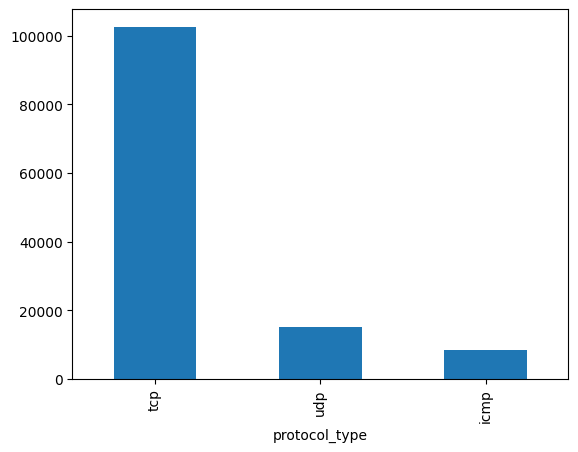

In [13]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

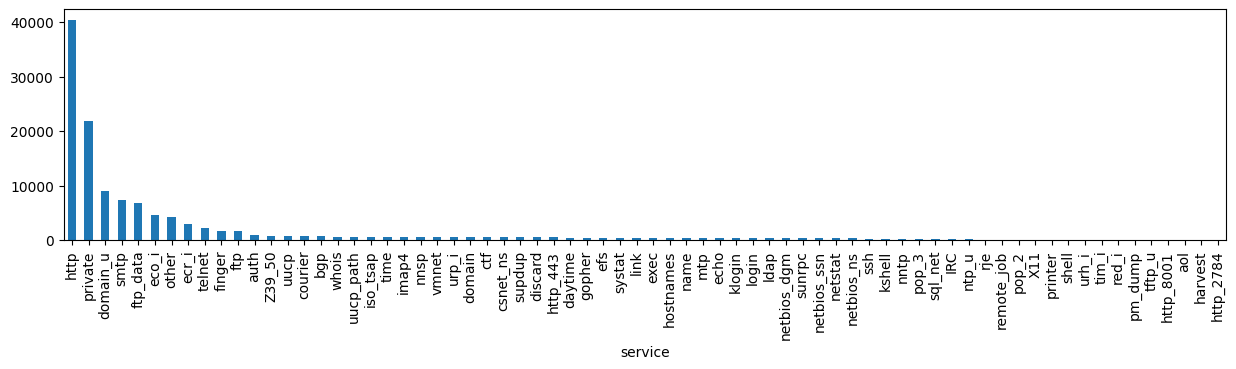

In [14]:
plt.figure(figsize=(15,3))
bar_graph('service')

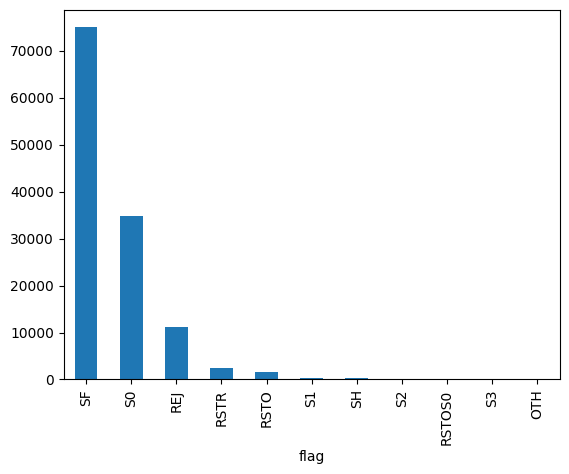

In [15]:
bar_graph('flag')

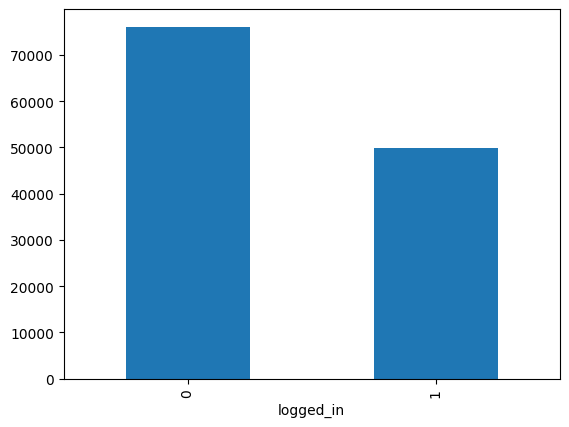

In [16]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

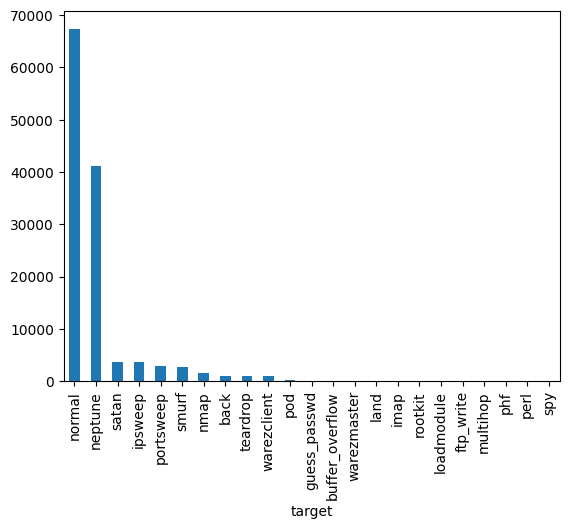

In [17]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

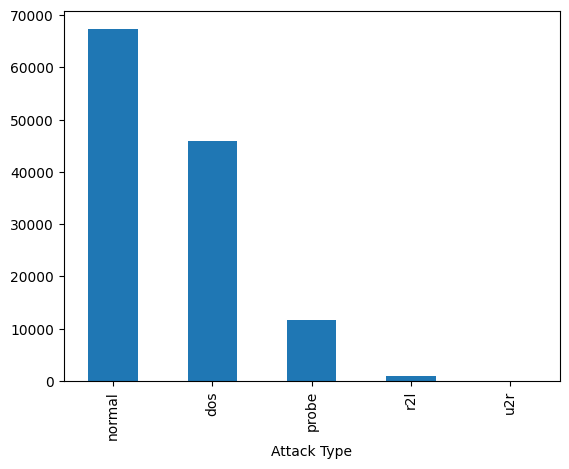

In [18]:
bar_graph('Attack Type')

In [19]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.

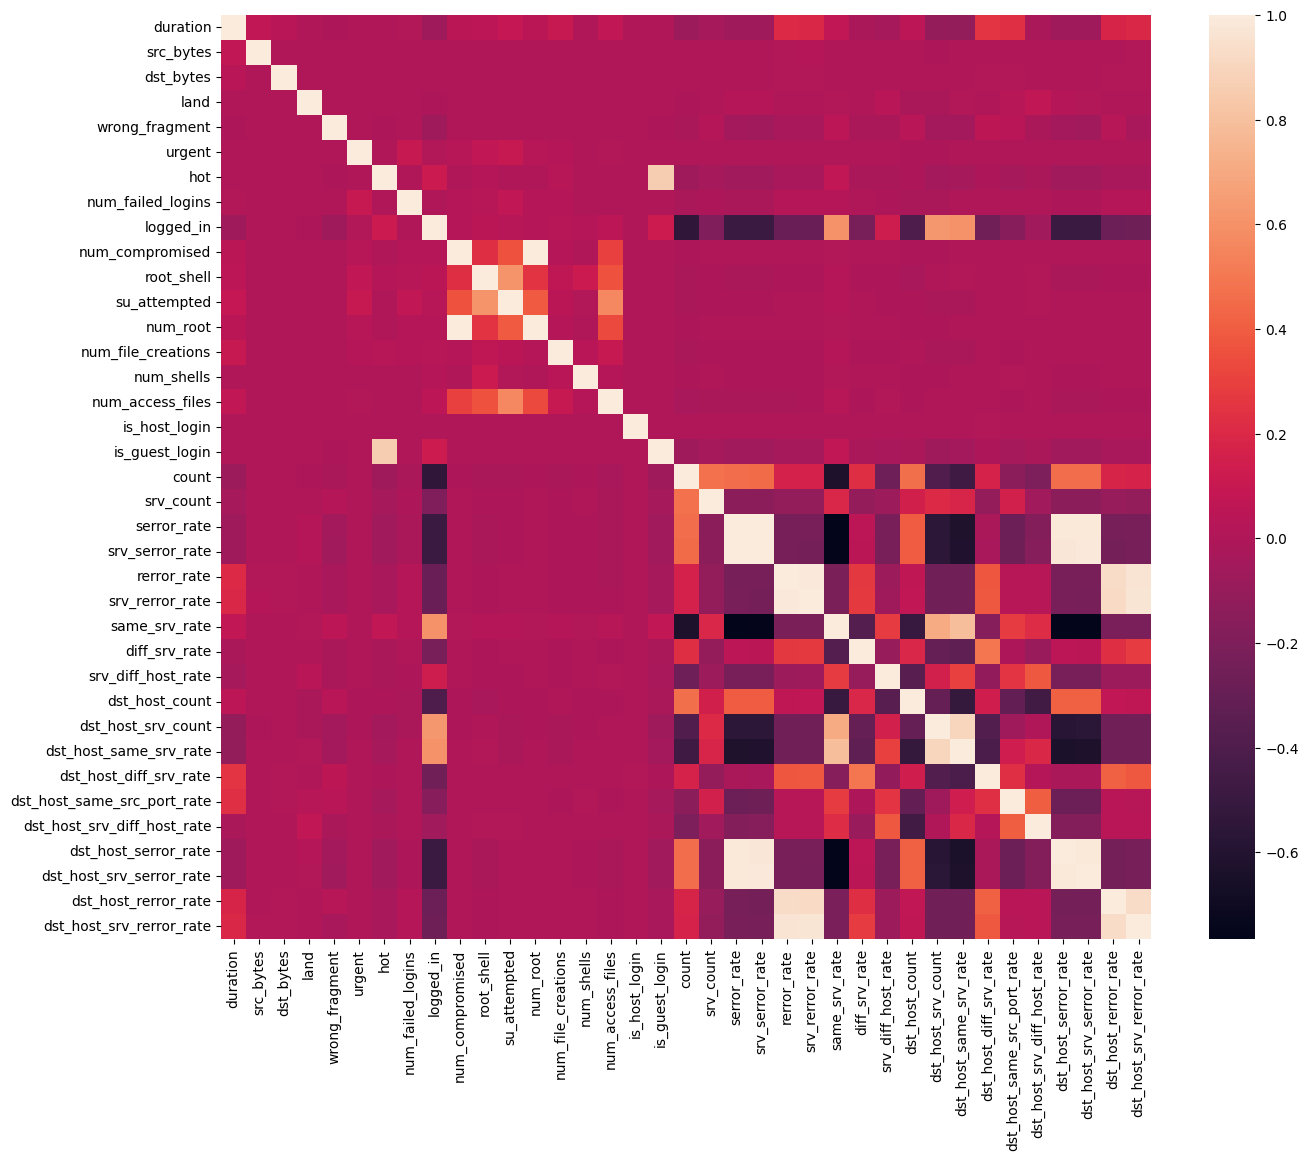

In [20]:
df = df.dropna(axis='columns')# drop columns with NaN 

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values 

# corr = df.corr() 

numeric_columns = df.select_dtypes(include=[np.number])  # Select only numeric columns

corr = numeric_columns.corr()  # Compute the correlation matrix for numeric columns

plt.figure(figsize =(15, 12)) 

sns.heatmap(corr) 

plt.show() 


In [21]:
df['num_root'].corr(df['num_compromised'])

0.9988334525784806

In [22]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9932892425370436

In [23]:
df['srv_count'].corr(df['count'])

0.4710794793612027

In [24]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9890076529820759

In [25]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.896663469935897

In [26]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9850522227996401

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9246878915781249

In [28]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.7889779634629466

In [29]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.7054097939154752

In [30]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.15853948314953006

In [31]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9793730829843271

In [32]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.977596011965445

In [33]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9811389586179855

In [34]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9862517164930897

In [35]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9267485035759211

In [36]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9178223356828739

In [37]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9644486655034548

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.970207997452235

In [39]:
# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 

# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 

# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [40]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal,normal


In [41]:
df.shape

(125973, 34)

In [42]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [43]:
df['protocol_type'].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.

In [44]:
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap) 


In [45]:
df['flag'].value_counts()

flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64

In [46]:
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 



In [47]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,ftp_data,0,491,0,0,0,0,0,...,1.00,0.00,0.00,150,25,0.03,0.17,0.00,normal,normal
1,0,2,other,0,146,0,0,0,0,0,...,0.08,0.15,0.00,255,1,0.60,0.88,0.00,normal,normal
2,0,1,private,1,0,0,0,0,0,0,...,0.05,0.07,0.00,255,26,0.05,0.00,0.00,neptune,dos
3,0,1,http,0,232,8153,0,0,0,0,...,1.00,0.00,0.00,30,255,0.00,0.03,0.04,normal,normal
4,0,1,http,0,199,420,0,0,0,0,...,1.00,0.00,0.09,255,255,0.00,0.00,0.00,normal,normal


Remove irrelevant features such as ‘service’ before modelling

In [48]:
# Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True) 


In [49]:
df.shape

(125973, 33)

Step 2 - Modeling

Importing libraries and splitting the dataset

In [50]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [52]:
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 

# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 

sc = MinMaxScaler() 
X = sc.fit_transform(X) 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 


(125973, 32)
(84401, 31) (41572, 31)
(84401, 1) (41572, 1)


In [53]:
X_test

array([[0.  , 1.  , 0.  , ..., 0.  , 1.  , 0.01],
       [0.  , 0.5 , 0.1 , ..., 0.05, 0.01, 0.  ],
       [0.  , 0.5 , 0.1 , ..., 0.06, 0.  , 0.  ],
       ...,
       [0.  , 1.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.5 , 0.  , ..., 0.  , 0.01, 0.01],
       [0.  , 0.5 , 0.1 , ..., 0.08, 0.  , 0.  ]])

In [54]:
y_test

,Attack Type
378,normal
32038,dos
86399,dos
74412,dos
52951,probe
...,...
81062,dos
53234,normal
48023,normal
109029,normal


In [55]:
y_train

,Attack Type
18593,probe
98800,probe
60094,dos
42119,normal
82618,normal
...,...
119879,dos
103694,dos
860,dos
15795,normal


In [56]:
X_train

array([[0.96662627, 0.5       , 0.3       , ..., 0.26      , 0.51      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.5       , 0.1       , ..., 0.06      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5       , 0.2       , ..., 0.07      , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , ..., 0.        , 0.05      ,
        0.05      ],
       [0.        , 1.        , 0.        , ..., 0.01      , 0.01      ,
        0.        ]])

Apply various machine learning classification algorithms such as Support Vector Machines, Random Forest, Naive Bayes, Decision Tree, Logistic Regression to create different models.

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score,f1_score
import time

import matplotlib.pyplot as plt

# Init models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion ="entropy", max_depth = 4),
    "Random Forest": RandomForestClassifier(n_estimators = 30),
    "Logistic Regression": LogisticRegression(max_iter = 1200000)
}

model_names = list(models.keys())
training_times = []
testing_times = []
training_accuracies = []
testing_accuracies = []
training_f1_scores = []
testing_f1_scores = []

for model_name, model in models.items():
    print(f"\nTraining and testing {model_name}:\n{'='*30}")

    # Train and evaluate model
    start_time_training = time.time()
    model.fit(X_train, y_train.values.ravel())
    end_time_training = time.time()
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()

    # Save results
    training_times.append(end_time_training - start_time_training)
    testing_times.append(end_time - start_time)
    training_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    testing_accuracies.append(accuracy_score(y_test, y_pred))
    
    # Calculate F1 scores for each class
    training_f1 = f1_score(y_train, model.predict(X_train), average=None)
    testing_f1 = f1_score(y_test, y_pred, average=None)
    
    # Save F1 scores
    training_f1_scores.append(training_f1)
    testing_f1_scores.append(testing_f1)
    
    # Print results
    print(f"Training Time: {end_time_training - start_time_training:.4f} seconds")
    print(f"Testing Time: {end_time - start_time:.4f} seconds")
    print(f"Training Accuracy: {accuracy_score(y_train, model.predict(X_train)):.4%}")
    print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.4%}\n")
    print("Training F1 Score:")
    print(training_f1)
    print("\nTesting F1 Score:")
    print(testing_f1)



Training and testing Gaussian Naive Bayes:
Training Time: 0.0636 seconds
Testing Time: 0.0184 seconds
Training Accuracy: 48.8075%
Testing Accuracy: 49.0955%

Training F1 Score:
[0.651572   0.15107796 0.67966285 0.17723116 0.01900802]

Testing F1 Score:
[0.65448313 0.15740281 0.68311908 0.18301435 0.01519579]

Training and testing Decision Tree:
Training Time: 0.1331 seconds
Testing Time: 0.0027 seconds
Training Accuracy: 92.5179%
Testing Accuracy: 92.3891%

Training F1 Score:
[0.96051501 0.9337903  0.78583702 0.         0.        ]

Testing F1 Score:
[0.9597881  0.93289624 0.78962047 0.         0.        ]

Training and testing Random Forest:
Training Time: 1.0619 seconds
Testing Time: 0.0732 seconds
Training Accuracy: 99.9739%
Testing Accuracy: 99.6777%

Training F1 Score:
[0.99996755 0.99975639 0.99896867 0.9984326  0.97058824]

Testing F1 Score:
[0.99953658 0.99705267 0.98983138 0.95389049 0.5       ]

Training and testing Logistic Regression:
Training Time: 2.7018 seconds
Testing 

Visualization

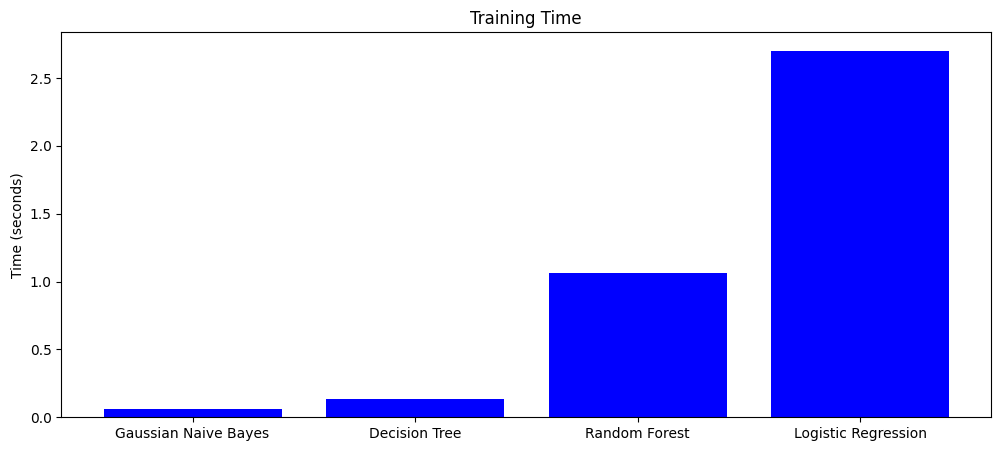

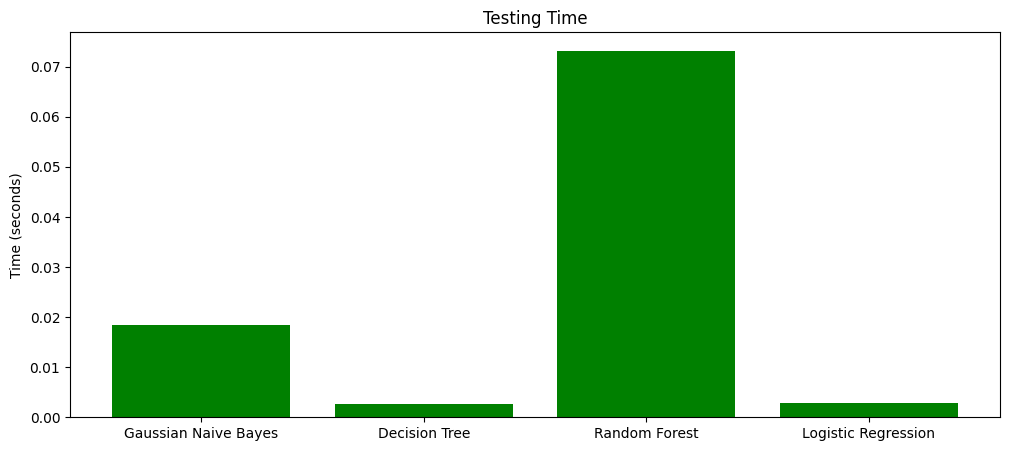

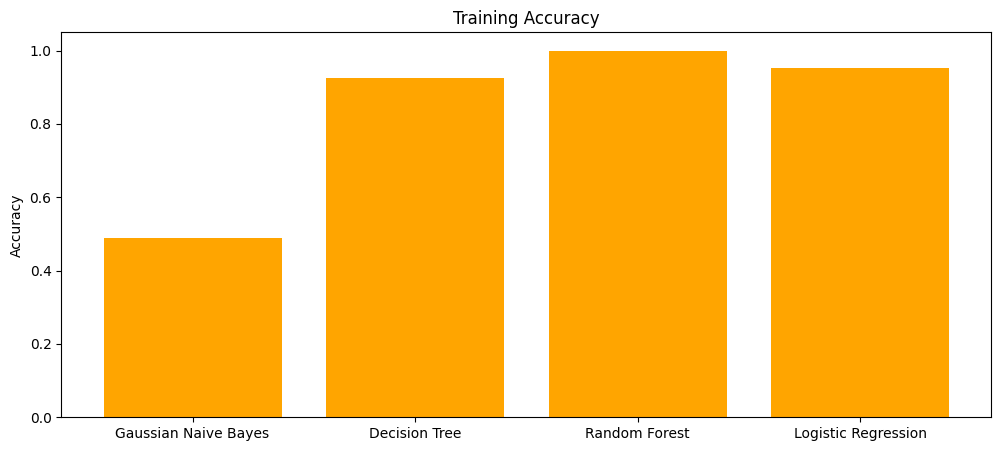

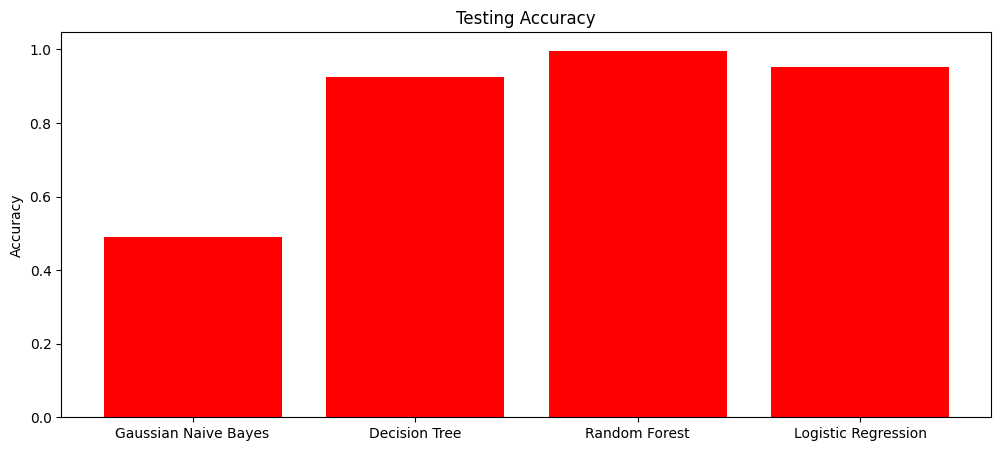

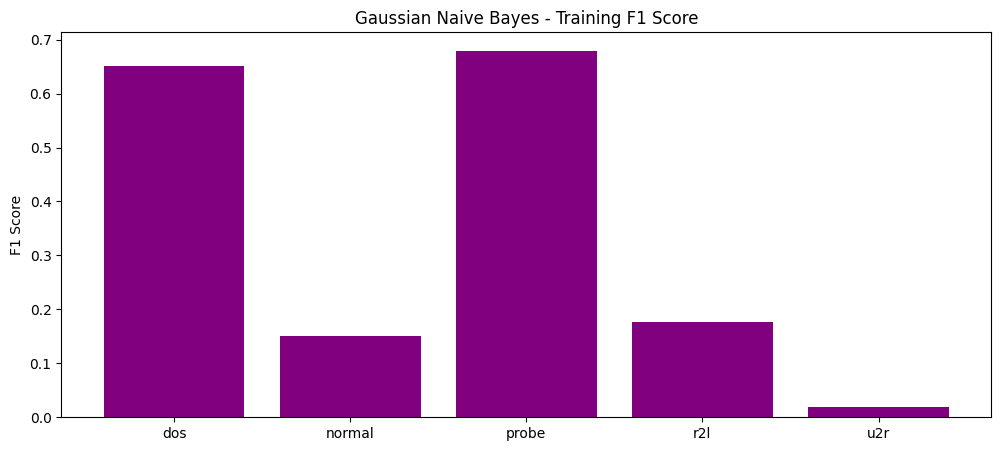

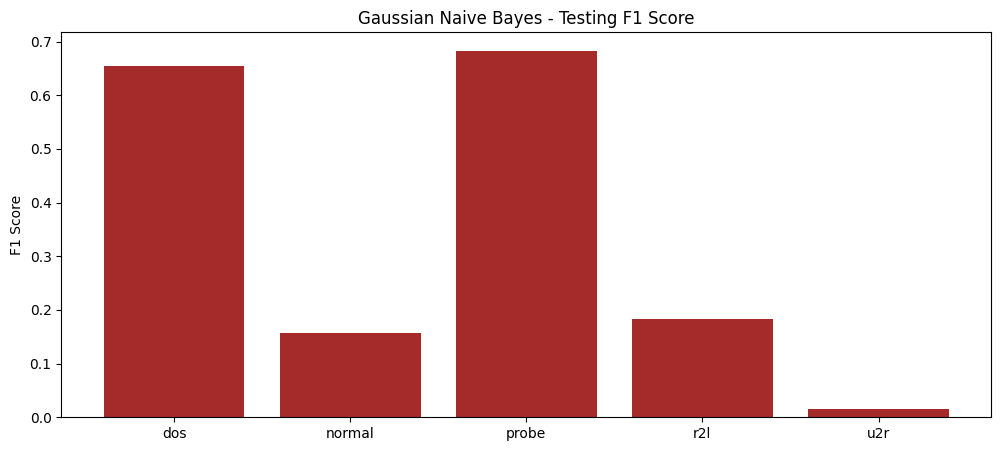

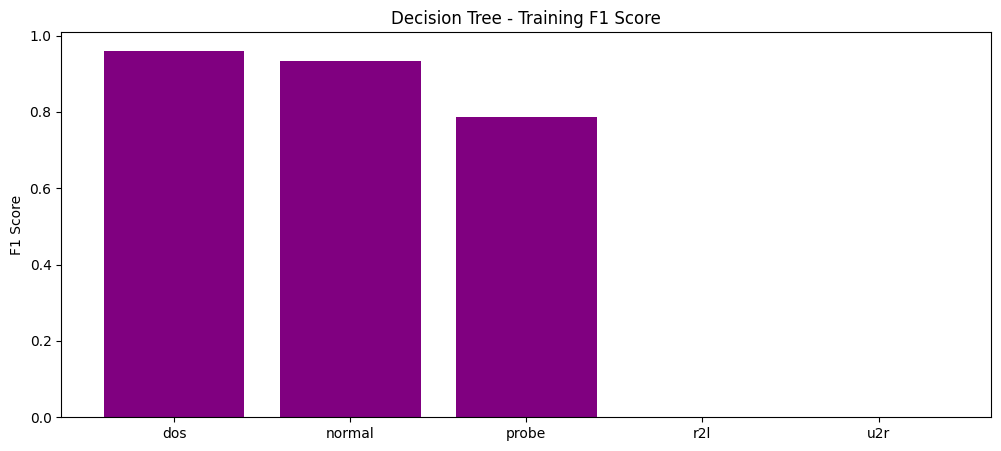

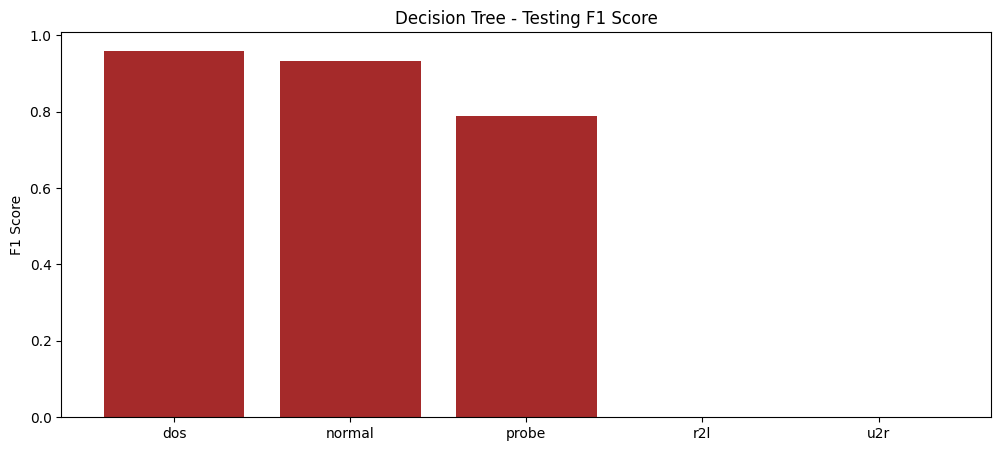

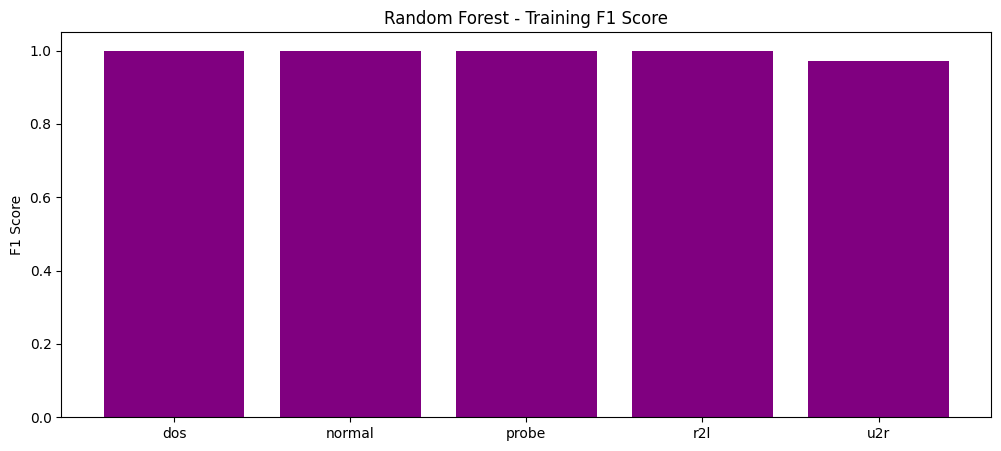

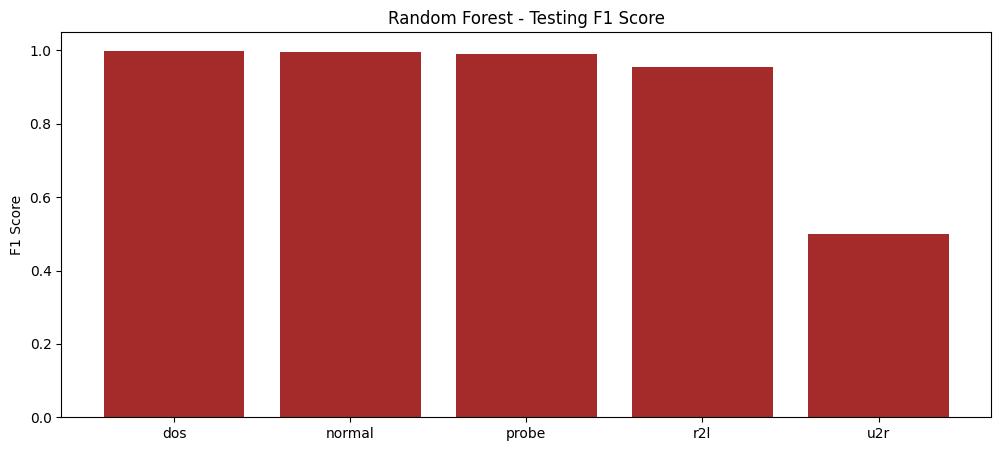

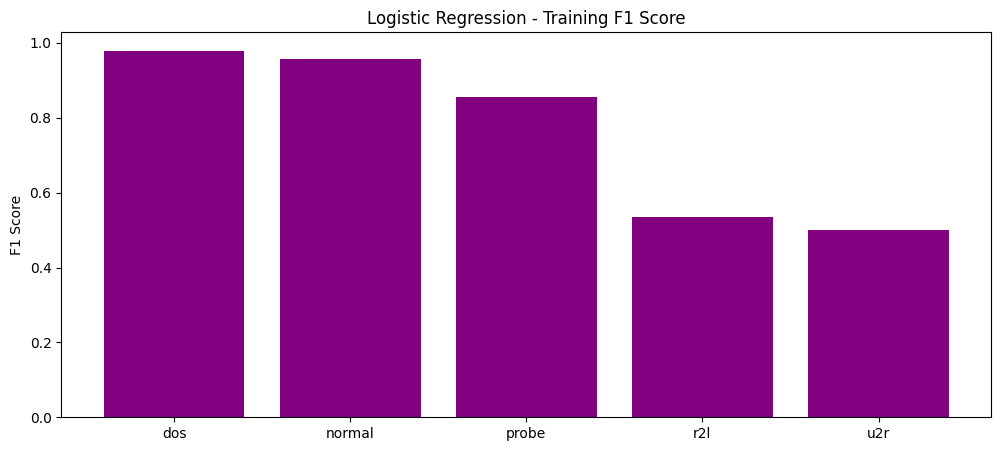

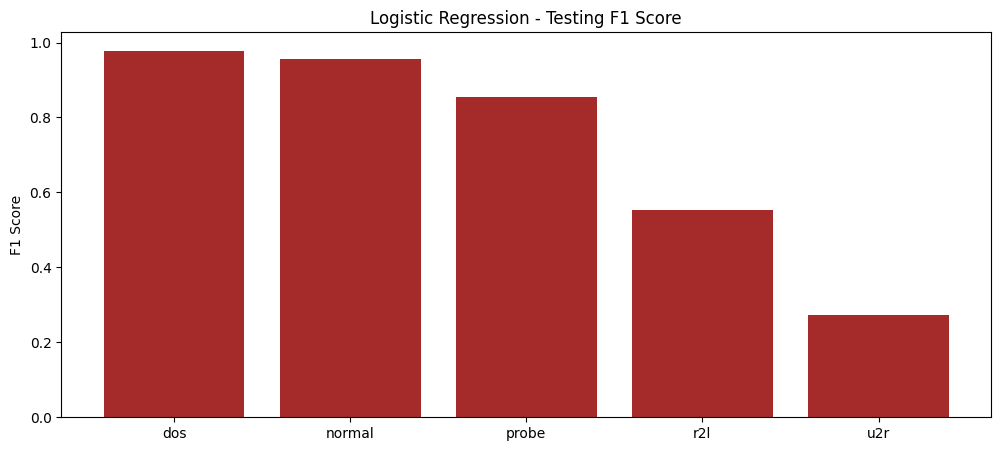

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot training time of each model
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.bar(model_names, training_times, color='blue')
ax1.set_title('Training Time')
ax1.set_ylabel('Time (seconds)')

plt.show()

# Plot testing time of each model
fig, ax2 = plt.subplots(figsize=(12,5))
ax2.bar(model_names, testing_times, color='green')
ax2.set_title('Testing Time')
ax2.set_ylabel('Time (seconds)')

plt.show()

# Plot training score of each model
fig, ax3 = plt.subplots(figsize=(12,5))
ax3.bar(model_names, training_accuracies, color='orange')
ax3.set_title('Training Accuracy')
ax3.set_ylabel('Accuracy')

plt.show()

# Plot testing score of each model
fig, ax4 = plt.subplots(figsize=(12,5))
ax4.bar(model_names, testing_accuracies, color='red')
ax4.set_title('Testing Accuracy')
ax4.set_ylabel('Accuracy')

plt.show()

# Add subplots for F1 scores
for i, model_name in enumerate(model_names):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["dos", "normal", "probe", "r2l", "u2r"], training_f1_scores[i], color='purple')
    ax.set_title(f'{model_name} - Training F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(["dos", "normal", "probe", "r2l", "u2r"], testing_f1_scores[i], color='brown')
    ax.set_title(f'{model_name} - Testing F1 Score')
    ax.set_ylabel('F1 Score')
    plt.show()

plt.tight_layout()
plt.show()
